In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')


In [3]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


What does the distribution of petal lengths look like?
Is there a correlation between petal length and petal width?
Would it be reasonable to predict species based on sepal width and sepal length?
Which features would be best used to predict species?

Text(6.674999999999997, 0.5, 'Petal Width')

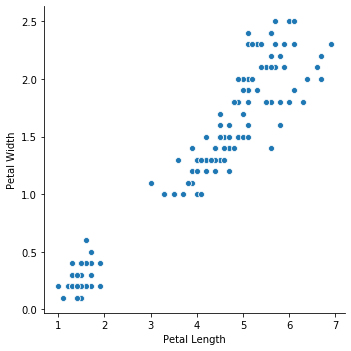

In [7]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [8]:
anscombe = sns.load_dataset('anscombe')

In [9]:
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [90]:
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


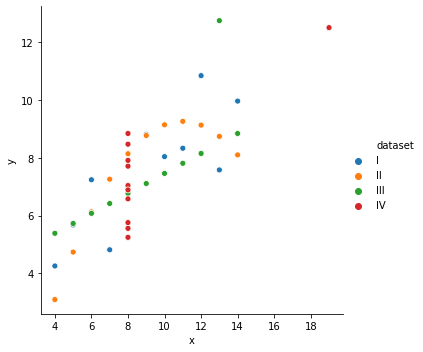

In [12]:
sns.relplot(x='x', y='y', hue="dataset",data=anscombe)

 Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? The datasets are evenly distributed.

In [13]:
anscombe.groupby("dataset").mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [14]:
anscombe.groupby('dataset').sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


In [91]:
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [21]:
from pydataset import data


In [22]:
InsectSprays = data("InsectSprays")

In [23]:
InsectSprays

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


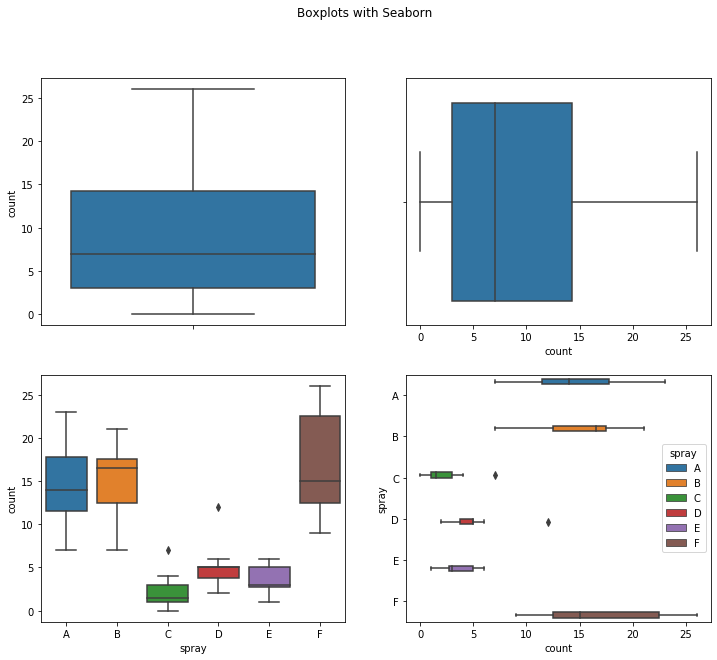

In [32]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=InsectSprays, y='count')


plt.subplot(222)
sns.boxplot(data=InsectSprays, x='count')

plt.subplot(223)
sns.boxplot(data=InsectSprays, y='count', x='spray')

plt.subplot(224)
sns.boxplot(data=InsectSprays, y='spray', x='count', hue='spray')


In [34]:
swiss = data("swiss")

In [35]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [40]:
swiss['is_Catholic'] = swiss.Catholic > 50.00

In [41]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


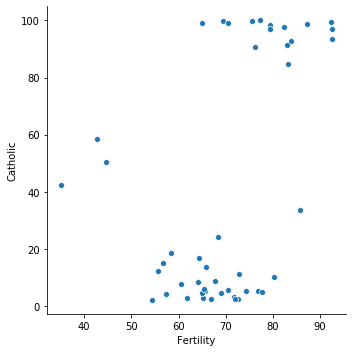

In [46]:
sns.relplot(x='Fertility', y='Catholic', data=swiss)

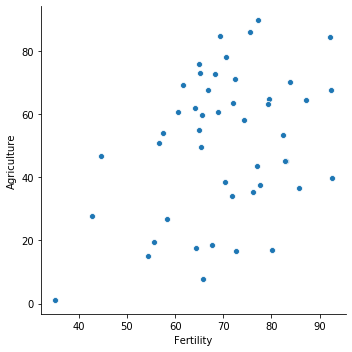

In [45]:
sns.relplot(x='Fertility', y='Agriculture', data=swiss)

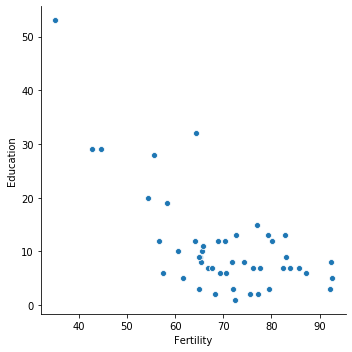

In [47]:
sns.relplot(x='Fertility', y='Education', data=swiss)

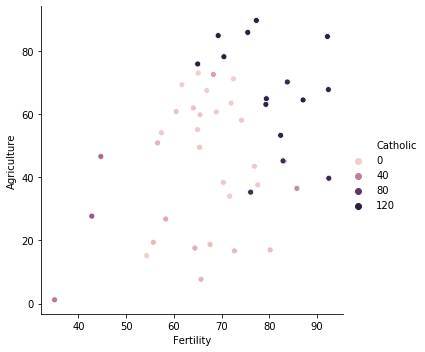

In [49]:
sns.relplot(x='Fertility', y='Agriculture', hue="Catholic", data=swiss)

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [51]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [65]:
orders = pd.read_sql('SELECT * FROM orders', url)

In [88]:
most_popular = orders.groupby("item_name").quantity.agg(['sum']).sort_values(by="sum", ascending=False).head(4)

In [89]:
most_popular

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [61]:
most_popular.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [68]:
most_popular.item_price = most_popular.item_price.str.replace("$","")

most_popular

In [77]:
most_popular['totals'] = most_popular.quantity * most_popular.item_price

In [78]:
most_popular


,id,order_id,quantity,item_name,choice_description,item_price,totals
3598,3599,1443,15,Chips and Fresh Tomato Salsa,nan,44.25,44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44.25 44...
4152,4153,1660,10,Bottled Water,nan,15.00,15.00 15.00 15.00 15.00 15.00 15.00 15.00 15.00 15.00 15.00
3887,3888,1559,8,Side of Chips,nan,13.52,13.52 13.52 13.52 13.52 13.52 13.52 13.52 13.52
3599,3600,1443,7,Bottled Water,nan,10.50,10.50 10.50 10.50 10.50 10.50 10.50 10.50
2441,2442,970,5,Bottled Water,nan,7.50,7.50 7.50 7.50 7.50 7.50
